<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/573_ADMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the function to update x based on the current estimate, the average, the dual variable, and the penalty parameter rho
def x_update(X, y, z, u, rho):
    n_features = X.shape[1]
    # Perform the update step for x
    return np.linalg.inv(X.T @ X + rho * np.eye(n_features)) @ (X.T @ y + rho * (z - u))

# Define the function to update z, the consensus variable, based on the current estimate of x and the dual variable
def z_update(x, u, n_agents):
    # Compute the average of the current estimate and the dual variable
    return np.mean(x + u, axis=0)

# Define the function to update the dual variable u based on its current value, the current estimate of x, and the consensus variable z
def u_update(u, x, z):
    # Perform the update step for the dual variable
    return u + x - z

# Define the function to generate synthetic data for linear regression
def generate_data(n_samples, n_features,sigma_2):
    np.random.seed(0)
    X = np.random.randn(n_samples, n_features)
    true_coef = np.random.randn(n_features, 1)
    y = X @ true_coef + np.random.randn(n_samples, 1) * sigma_2
    return X, y

# Define the function to calculate the global error (mean squared error) across all agents
def compute_global_error(agents_data, x):
    total_error = 0
    for i, (X, y) in enumerate(agents_data):
        predictions = X @ x[i]
        total_error += np.mean((y - predictions) ** 2)
    return total_error / n_agents

# Define the function to calculate the variance of the estimates across all agents
def compute_variance(x, z):
    # Calculate the variance between the local estimates x and the consensus variable z
    return np.mean(np.linalg.norm(x - z, axis=1) ** 2)


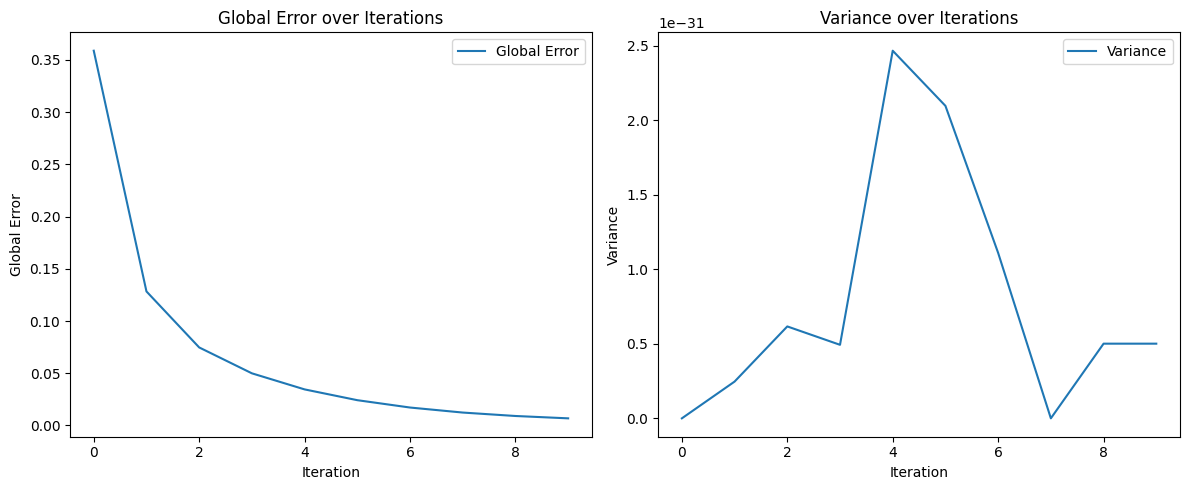

In [ ]:
# Set the parameters for the simulation
n_samples = 10
n_features = 10
n_agents = 5
rho = 1.0
sigma_2=1
n_iterations = 10

# Generate data for each agent
agents_data = [generate_data(n_samples, n_features,sigma_2) for _ in range(n_agents)]

# Initialize variables for ADMM
x = np.zeros((n_agents, n_features, 1))
z = np.mean(x, axis=0)
u = np.zeros_like(x)

# Lists to store the history of the global error and variance for plotting
global_errors = []
variances = []

# Perform ADMM iterations

for it in range(n_iterations):
    for i in range(n_agents):
        X, y = agents_data[i]
        x[i] = x_update(X, y, z, u[i], rho)
    z = z_update(x, u, n_agents)
    for i in range(n_agents):
        u[i] = u_update(u[i], x[i], z)

    # Compute the global error and variance at this iteration
    global_error = compute_global_error(agents_data, x)
    variance = compute_variance(x, z)
    global_errors.append(global_error)
    variances.append(variance)

# Plot the global error and variance over iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(global_errors, label='Global Error')
plt.xlabel('Iteration')
plt.ylabel('Global Error')
plt.title('Global Error over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(variances, label='Variance')
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance over Iterations')
plt.legend()

plt.tight_layout()
plt.show()
